In [6]:
VERSION = 31
CLOUD_SINGLE = True
MIXUP = False
NO_BLACK_LOSS = True
DATA_SMALL = True
WEIGHTED = False
FOCAL_LOSS = 0

In [16]:
%run ./Code.ipynb

In [3]:
#if 'train_md' not in globals() or 'test_md' not in globals():
#    train_md, test_md = loadMetadata()

In [4]:
if 'train_md' not in globals():
    train_md = loadMetadata2()

# Pre-processing features

In [5]:
#_,_ = loadMetadata(True)

In [6]:
#for ds in my_datasets3:
#    preprocessedData(ds)

#for ds in my_datasets5:
#    preprocessedData(11, folds=range(5))

In [14]:
#preprocessedData(14,fold_col='fold5',do_test=False,folds=range(2))

# Running

In [17]:
weight_decay = 1e-4
lrs = np.array([2e-4, 2e-5, 5e-6, 2e-6])
epochs = np.array([4, 4, 3, 2])
stg = time.time()
ds=14
folds = getNFolds(ds)
for f in range(folds):
    for i,lr in enumerate(lrs):
        learning_rate = lr
        model, predictions, val_results = train_one(dataset=ds, epochs=epochs[i], bs=32, fold=f)
    print('total time', time.time() - stg)
print('total time', time.time() - stg)

completed epochs: 0 starting now: 4
DataSet 14 train size 17369 fold 0
DataSet 14 valid size 4375 fold 0
setFeats, augmentation 0
dataset train: 173 valid: 43 loader train: 5 valid: 2
starting from scratch
setFeats, augmentation -1
v31, d14, e1, f0, trn ll: 0.3746, val ll: 0.7042, ll_w: 0.7049, cor: -0.1458, auc: 0.3063, lr: 0.0002
setFeats, augmentation -1
v31, d14, e2, f0, trn ll: 0.3278, val ll: 0.6967, ll_w: 0.6963, cor: -0.1622, auc: 0.2812, lr: 0.0002
setFeats, augmentation -1
v31, d14, e3, f0, trn ll: 0.2923, val ll: 0.6767, ll_w: 0.6766, cor: -0.1642, auc: 0.2866, lr: 0.0002
setFeats, augmentation -1
v31, d14, e4, f0, trn ll: 0.2632, val ll: 0.6460, ll_w: 0.6471, cor: -0.1558, auc: 0.3186, lr: 0.0002
total running time 61.93279147148132
completed epochs: 0 starting now: 4
DataSet 14 train size 17369 fold 0
DataSet 14 valid size 4375 fold 0
setFeats, augmentation 0
dataset train: 173 valid: 43 loader train: 5 valid: 2
starting from scratch
setFeats, augmentation -1
v31, d14, e1,

KeyboardInterrupt: 

In [9]:
%debug

> c:\users\nosou\anaconda3\envs\fastai\lib\site-packages\sklearn\utils\validation.py(230)check_consistent_length()
    228     if len(uniques) > 1:
    229         raise ValueError("Found input variables with inconsistent numbers of"
--> 230                          " samples: %r" % [int(l) for l in lengths])
    231 
    232 

ipdb> u
> c:\users\nosou\anaconda3\envs\fastai\lib\site-packages\sklearn\metrics\classification.py(1764)log_loss()
   1762     """
   1763     y_pred = check_array(y_pred, ensure_2d=False)
-> 1764     check_consistent_length(y_pred, y_true, sample_weight)
   1765 
   1766     lb = LabelBinarizer()

ipdb> u
> <ipython-input-2-9a97cf042158>(120)<listcomp>()
    118 
    119         lls = [log_loss(loc_data.loc[~loc_data.test, all_ich[k]].values, val_results[:,k], eps=1e-7, labels=[0,1])\
--> 120                for k in range(6)]
    121         ll = (class_weights * np.array(lls)).mean()
    122         cor = np.corrcoef(loc_data.loc[~loc_data.test,all_ich].values

In [7]:
weight_decay = 1e-4
lrs = np.array([1e-5, 5e-6])
epochs = np.array([2, 1])
stg = time.time()
WEIGHTED = True
for ds in range(13,14):
    folds = getNFolds(ds)
    for f in range(folds):
        for i,lr in enumerate(lrs):
            learning_rate = lr
            model, predictions, val_results = train_one(dataset=ds, epochs=epochs[i], bs=32, fold=f, init_ver=31)
        print('total time', time.time() - stg)
    print('total time', time.time() - stg)
print('total time', time.time() - stg)

completed epochs: 0 starting now: 2
DataSet 13 train size 15619 fold 0
adding dummy serieses 25
DataSet 13 valid size 3936 fold 0
setFeats, augmentation 0
WeightedRandomSampler
dataset train: 15619 valid: 3936 loader train: 488 valid: 123
loading model model.b13.f0.d13.v31
setFeats, augmentation -1
Batch 50 device: cuda time passed: 12.934 time per batch: 0.259
Batch 100 device: cuda time passed: 24.369 time per batch: 0.244
Batch 150 device: cuda time passed: 35.998 time per batch: 0.240
Batch 200 device: cuda time passed: 47.590 time per batch: 0.238
Batch 250 device: cuda time passed: 60.847 time per batch: 0.243
Batch 300 device: cuda time passed: 72.590 time per batch: 0.242
Batch 350 device: cuda time passed: 84.074 time per batch: 0.240
Batch 400 device: cuda time passed: 95.366 time per batch: 0.238
Batch 450 device: cuda time passed: 108.312 time per batch: 0.241
Batch 50 device: cuda time passed: 4.791 time per batch: 0.096
Batch 100 device: cuda time passed: 8.978 time per b

DataSet 13 train size 15583 fold 2
adding dummy serieses 21
DataSet 13 valid size 3968 fold 2
setFeats, augmentation 0
WeightedRandomSampler
dataset train: 15583 valid: 3968 loader train: 486 valid: 124
loading model model.b2.f2.d13.v32
setFeats, augmentation -1
Batch 50 device: cuda time passed: 13.135 time per batch: 0.263
Batch 100 device: cuda time passed: 24.596 time per batch: 0.246
Batch 150 device: cuda time passed: 36.419 time per batch: 0.243
Batch 200 device: cuda time passed: 47.964 time per batch: 0.240
Batch 250 device: cuda time passed: 60.716 time per batch: 0.243
Batch 300 device: cuda time passed: 72.241 time per batch: 0.241
Batch 350 device: cuda time passed: 83.980 time per batch: 0.240
Batch 400 device: cuda time passed: 95.428 time per batch: 0.239
Batch 450 device: cuda time passed: 108.327 time per batch: 0.241
Batch 50 device: cuda time passed: 4.663 time per batch: 0.093
Batch 100 device: cuda time passed: 8.966 time per batch: 0.090
v32, d13, e3, f2, trn ll:

In [9]:
(5*3 + 3*3)*(9241.546682834625 + 2074.936990737915)/5/3600

15.08864489809672

# Analysis

In [13]:
stats = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(f,31)) for f in range(5)],axis=0)
stats.loc[stats.epoch==13].groupby('dataset')[['val_loss','val_w_loss']].mean()

,val_loss,val_w_loss
dataset,,
6,0.063542,0.069056
7,0.062726,0.068622
8,0.064020,0.069777
9,0.062367,0.067991
10,0.062012,0.067773
11,0.061149,0.066677
12,0.060799,0.066053
13,0.061087,0.066270


In [11]:
stats = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(f,32)) for f in range(5)],axis=0)
stats.loc[stats.epoch==3].groupby('dataset')[['val_loss','val_w_loss']].mean()

,val_loss,val_w_loss
dataset,,
6,0.064378,0.068053
7,0.063824,0.067963
8,0.065129,0.068768
9,0.062979,0.067057
10,0.062737,0.067054
11,0.061973,0.065464
12,0.061613,0.064652
13,0.061888,0.064962


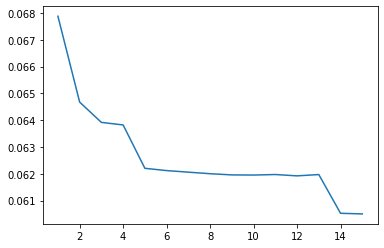

In [14]:
plt.plot(stats.groupby('epoch').mean().val_loss)

In [53]:
predictions.shape

(3941, 60, 6)

In [54]:
predictions.mean((0,1))

array([0.360946  , 0.15772094, 0.21251288, 0.22738211, 0.23613851,
       0.2085103 ], dtype=float32)

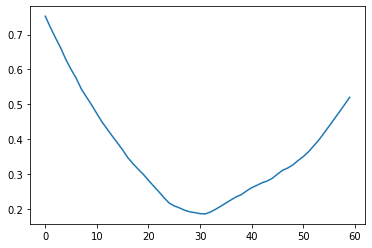

In [55]:
plt.plot(predictions.mean(0)[:,0])

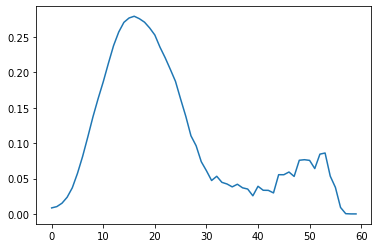

In [56]:
dd = train_md.loc[train_md.fold5==4].copy()
dd['res'] = val_results[:,0]

plt.plot(dd[['res','pos_idx']].groupby('pos_idx').mean().values)